## Trabajo No. 4

### Sobre: Regresión Logística
#### Integrantes: Cristian Yepes Sanchez, Edison Escobar Posada

In [332]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [348]:
dataset = pd.read_csv('Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
#dataFrame = pd.read_csv('Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
#dataset.head()

In [349]:
dataset = dataset.drop("customerID", axis=1)
#dataset

In [350]:
encode = LabelEncoder()
for column in dataset.columns:
    if(column != "tenure" and column != "MonthlyCharges" and column != "TotalCharges"):
        dataset[column] = encode.fit_transform(dataset[column].values)
#dataset

In [351]:
#print dataset.count()
#col_names = dataset.columns.tolist()
#for column in col_names:
#    print "Valores nulos en <{0}>: {1}".format(column, dataset[column].isnull().sum())
dataset[dataset.TotalCharges == ' '] = '0'
dataset[dataset.TotalCharges == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [352]:
for column in dataset.columns:
        dataset[column] = dataset[column].astype(float)

#dataset['tenure'] = dataset['tenure'].astype(float)
#dataset['MonthlyCharges'] = dataset['MonthlyCharges'].astype(float)
#dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)

dataset['tenure'] = dataset['tenure']*0.01
dataset['MonthlyCharges'] = dataset['MonthlyCharges']*0.1
dataset['TotalCharges'] = dataset['TotalCharges']*0.001
#dataset['tenure'] = np.round(dataset['tenure'].values,2)
#dataset['MonthlyCharges'] = np.round(dataset['MonthlyCharges'].values,2)
#dataset['TotalCharges'] = np.round(dataset['TotalCharges'].values,2)
dataset.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.01,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.985,0.02985,0.0
1,1.0,0.0,0.0,0.0,0.34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,5.695,1.88950,0.0
2,1.0,0.0,0.0,0.0,0.02,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.385,0.10815,1.0
3,1.0,0.0,0.0,0.0,0.45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,4.230,1.84075,0.0
4,0.0,0.0,0.0,0.0,0.02,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.070,0.15165,1.0


In [353]:
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0.0,1.0,0.0,0.01,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.985,0.02985,0.0
1,1.0,0.0,0.0,0.0,0.34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,5.695,1.88950,0.0
2,1.0,0.0,0.0,0.0,0.02,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,5.385,0.10815,1.0
3,1.0,0.0,0.0,0.0,0.45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,4.230,1.84075,0.0
4,0.0,0.0,0.0,0.0,0.02,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,7.070,0.15165,1.0


In [407]:
arr_X = dataset[dataset.columns[0:19]].as_matrix()
arr_Y = dataset[dataset.columns[-1]].as_matrix()

C:\Users\SergioEscudero\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\SergioEscudero\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [408]:
x_train, x_test, y_train, y_test = train_test_split(arr_X, arr_Y, test_size=0.3)

In [380]:
def sigmoid(z):
    '''
    Returns sigmoid activation for array z
    '''
    a = 1. / (1. + np.exp(-z)) 
    
    return a 

In [381]:
def linear_activation(W, b, X):
    z = np.dot(W.T,X) + b
    
    return z

In [382]:
def predict(W,b,X):
    z = linear_activation(W,b,X)
    A = sigmoid(z)
    return np.round(A)

In [383]:
def loss(y, a):
#   for i in range(len(a)):
#       if((1 - a[0][i]) <= 1):
#            a[0][i] = 0.99
    return -(y * np.log(a) + (1-y) * np.log(1-a))

In [384]:
def cost(logloss):
    return np.mean(logloss)

In [385]:
print arr_X[0].shape[0]
print x_train.T.shape[1]

19
4930


(19L, 4930L)
(1L, 4930L)
('m: ', 4930L)
('W inicial: ', array([[-0.47030967],
       [-0.88600751],
       [ 0.51143653],
       [ 0.70859736],
       [-0.61762826],
       [ 1.46576967],
       [-1.80135812],
       [ 0.55996238],
       [ 0.3172824 ],
       [ 0.93085512],
       [ 1.12593038],
       [-0.42690181],
       [-0.69664119],
       [-0.23106386],
       [ 0.97365131],
       [-0.49064623],
       [ 0.49757685],
       [-0.48467298],
       [ 1.32778604]]))
('b inicial: ', 0.1)
('costo: ', 3.1537879968933598)
('costo: ', 0.41191644801149374)
('costo: ', 0.41054393876793494)
('costo: ', 0.4099088934062264)
('costo: ', 0.4093943720214524)
('costo: ', 0.4089621089165759)
('costo: ', 0.40859709696728547)
('costo: ', 0.40828783597471086)
('costo: ', 0.40802502640854454)
('costo: ', 0.40780108337594384)
('W actualizado: ', array([[-0.08744004],
       [ 0.2562949 ],
       [-0.03432521],
       [-0.20764463],
       [-4.01913347],
       [-0.94866094],
       [ 0.11452998],
   

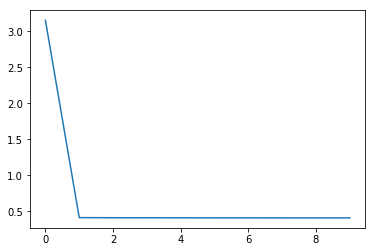

In [409]:
#seed = 2
#np.random.seed(seed)

#X = np.random.rand(10,5)##matriz de 10 x 5 donde 10 son las feactures
X = x_train.T
print(X.shape)
#Y = np.array([[0, 1,0,1,1]])#matriz de  1x 5 donde 5 son los registros
Y = np.array([y_train])
print(Y.shape)
m = X.shape[1]

W = np.random.randn(arr_X[0].shape[0],1)#Matriz de 10 x 1 donde 10 son las feactures random
b = 0.1

print("m: ", m)
print("W inicial: ",W)
print("b inicial: ",b)

learning_rate = 0.2
cost_list = []

for i in range(10000): #1000 iteraciones del descenso del gradiente
    '''
    Activacion hacia adelante
    '''
    Z = linear_activation(W,b,X)
    A = sigmoid(Z)
    
    '''
    Activacion hacia atras - retropropagacion del error
    '''
    dz = A - Y
    dW = np.dot(X,dz.T) / m
    db = np.sum(dz) / m
    
    '''
    Actualizacion de parametros mediante descenso del gradiente
    '''
    W -= learning_rate * dW
    b -= learning_rate * db
    
    J = cost(loss(Y,A))

    if(i%1000 == 0):
        #print(A)
        #print(Y)
        cost_list.append(J)
        print("costo: ", J)

print("W actualizado: ",W)
print("b actualizado: ",b)
print("costo total: ", J)

plt.plot(cost_list)
plt.show()

In [410]:
Y_hat = predict(W,b,X)
print("predicciones: ",np.round(Y_hat))
print("clases originales: ", Y)

('predicciones: ', array([[0., 0., 0., ..., 1., 0., 0.]]))
('clases originales: ', array([[0., 0., 0., ..., 0., 0., 0.]]))


In [411]:
YP = np.round(Y_hat)
K = Y - YP
#len(K[0])
print K[0]

[ 0.  0.  0. ... -1.  0.  0.]


In [412]:
def score(YP, Y):
    K = Y - YP
    j = 0
    for i in range(len(K[0])):
        if(K[0][i] != 0):
            j +=1
    return (100-(j*100)/len(K[0]))

In [413]:
#error = (j*100)/len(K[0])
#print("El error es de "+str(error)+"% con una efectividad de "+str(100-error)+"%")
print("Efectividad de "+str(score(YP,Y))+"%")

Efectividad de 81%


In [414]:
print YP.shape
print Y.shape
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, YP)*100

(1L, 4930L)
(1L, 4930L)


19.168356997971603

In [400]:
from sklearn import linear_model
X = np.array(dataset.drop(['Churn'],1))
y = np.array(dataset['Churn'])
print X.shape
print y.shape

(7043L, 19L)
(7043L,)


In [401]:
model = linear_model.LogisticRegression()
model.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [405]:
predictions = model.predict(X)

In [406]:
model.score(X,y)*100

80.47706943064034